In [1]:

!pip install numpy -q
!pip install pandas -q
!pip install matplotlib -q
!pip install tensorflow -q

!pip install opendatasets -q

In [2]:
# import necessary libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time


In [3]:
#!pip install split-folders

In [4]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [5]:

train_data_dir = "/content/drive/MyDrive/Samples Graphite/train"
test_data_dir = "/content/drive/MyDrive/Samples Graphite/test"
val_data_dir = "/content/drive/MyDrive/Samples Graphite/val"

In [6]:
train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE,
                                                         )

validation_data = tf.keras.utils.image_dataset_from_directory(val_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size=BATCH_SIZE,
                                                         image_size=IMAGE_SIZE)

Found 844 files belonging to 2 classes.
Found 130 files belonging to 2 classes.
Found 332 files belonging to 2 classes.


In [7]:
class_names = train_data.class_names
class_names

['92%', '97%']

In [8]:
for image_batch,label_batch in train_data.take(1):
    print(image_batch.shape)
    print(label_batch.shape)

(32, 128, 128, 3)
(32,)


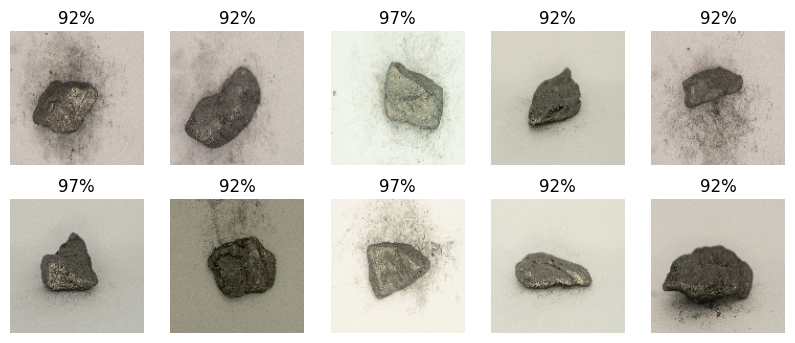

In [9]:
# plot data sample
plt.figure(figsize=(10,4))
for image,label in train_data.take(1):
    for i in range(10):
        ax = plt.subplot(2,5,i+1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(class_names[label[i]])
        plt.axis('off')

In [10]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[206.39136 200.39136 188.39136]
   [205.52588 199.73535 187.73535]
   [207.30615 201.30615 189.30615]
   ...
   [208.57275 204.57275 192.57275]
   [210.      205.67334 193.67334]
   [205.19922 201.19922 189.19922]]

  [[204.42114 200.42114 188.42114]
   [207.11157 201.11157 189.11157]
   [208.83594 202.83594 190.83594]
   ...
   [205.15674 201.15674 189.15674]
   [210.56421 206.56421 194.56421]
   [201.38599 197.38599 185.38599]]

  [[203.56519 199.56519 187.56519]
   [207.77832 202.48926 190.48926]
   [203.62329 197.62329 185.62329]
   ...
   [206.1001  202.1001  190.1001 ]
   [206.16138 202.16138 190.16138]
   [206.72485 201.97778 189.97778]]

  ...

  [[206.03955 200.03955 188.03955]
   [200.59448 194.59448 182.59448]
   [202.3164  196.3164  184.3164 ]
   ...
   [200.66797 196.66797 184.66797]
   [203.6997  199.6997  187.6997 ]
   [201.40942 197.40942 185.40942]]

  [[204.5127  198.5127  186.5127 ]
   [200.55176 194.55176 182.55176]
   [202.54492 196.54492 184.54492]
 

In [11]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [12]:
for image,label in train_data.take(1):
    for i in range(1):
      print(image)

tf.Tensor(
[[[[0.75067115 0.73890644 0.6800829 ]
   [0.7448625  0.72284967 0.66744214]
   [0.7515481  0.7280187  0.67311674]
   ...
   [0.7484892  0.73352194 0.67576593]
   [0.7302093  0.7184446  0.65962106]
   [0.7413115  0.7289063  0.67029625]]

  [[0.74579406 0.73402935 0.6752058 ]
   [0.74240863 0.7306439  0.6718204 ]
   [0.75624806 0.73271865 0.6778167 ]
   ...
   [0.7520182  0.7402535  0.68143   ]
   [0.7492714  0.7375067  0.67868316]
   [0.75303596 0.74127126 0.68244773]]

  [[0.74690944 0.73514473 0.6763212 ]
   [0.7596517  0.747887   0.68906343]
   [0.74675435 0.72322494 0.668323  ]
   ...
   [0.7444087  0.732644   0.67382044]
   [0.74307215 0.73130745 0.6724839 ]
   [0.7404469  0.7286822  0.6698587 ]]

  ...

  [[0.7669166  0.74338716 0.6884852 ]
   [0.7494457  0.72591627 0.6710143 ]
   [0.74873525 0.72520584 0.6703039 ]
   ...
   [0.7362142  0.7244495  0.66562593]
   [0.74356806 0.73180336 0.67297983]
   [0.74265474 0.73089004 0.6720665 ]]

  [[0.7307933  0.7072639  0.652361

In [13]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",input_shape=(128,128,3)),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
  ]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
pretrained_model = tf.keras.applications.xception.Xception(include_top=False,
                                                           input_shape=(128,128,3),
                                                           weights="imagenet",
                                                           pooling='max')

for layer in pretrained_model.layers:
        layer.trainable=False

In [15]:
model = tf.keras.models.Sequential()

model.add(pretrained_model)

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 2048)           │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,144,425 (80.66 MB)

 Trainable params: 282,945 (1.08 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [18]:
start_time = time.time()
history = model.fit(train_data,
                    epochs=6,
                    validation_data=validation_data)

end_time = time.time()


Epoch 1/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 130s 4s/step - accuracy: 0.6815 - loss: 0.5701 - val_accuracy: 0.8462 - val_loss: 0.3519
Epoch 2/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.8584 - loss: 0.3287 - val_accuracy: 0.8692 - val_loss: 0.2798
Epoch 3/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 145s 4s/step - accuracy: 0.8740 - loss: 0.2798 - val_accuracy: 0.8385 - val_loss: 0.3977
Epoch 4/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.9265 - loss: 0.1825 - val_accuracy: 0.9000 - val_loss: 0.2075
Epoch 5/5
27/27 ━━━━━━━━━━━━━━━━━━━━ 136s 4s/step - accuracy: 0.9567 - loss: 0.1056 - val_accuracy: 0.9231 - val_loss: 0.2200


In [19]:
print(f'Total time for training {(end_time-start_time):.3f} seconds')

Total time for training 715.314 seconds


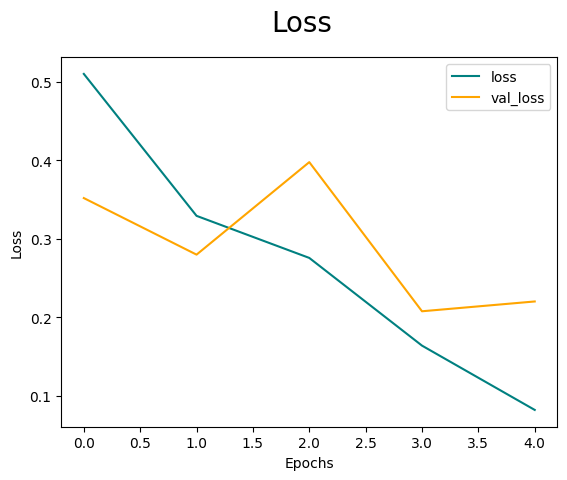

In [20]:


fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.xlabel('Epochs')      # Name for the x-axis
plt.ylabel('Loss')        # Name for the y-axis
plt.legend()
plt.show()


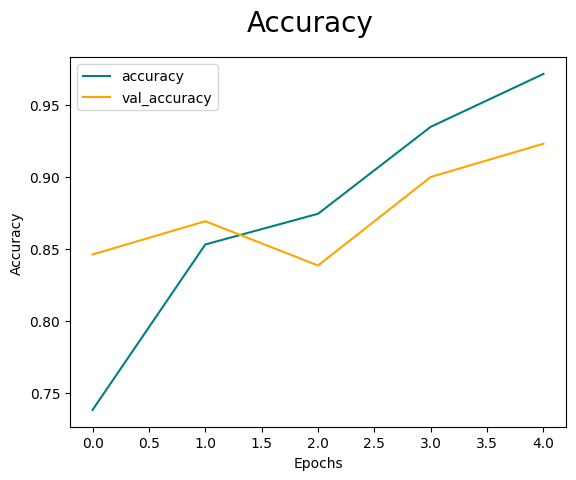

In [21]:


fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.xlabel('Epochs')      # Label for the x-axis
plt.ylabel('Accuracy')    # Label for the y-axis
plt.legend()
plt.show()


In [22]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
accuracy = tf.keras.metrics.BinaryAccuracy()


In [23]:

for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    accuracy.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [24]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.925000011920929>

In [25]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.8809523582458496>

In [26]:
accuracy.result()


<tf.Tensor: shape=(), dtype=float32, numpy=0.9036144614219666>

#**TEST**

In [27]:
!pip install opencv-python -q

In [28]:
import cv2



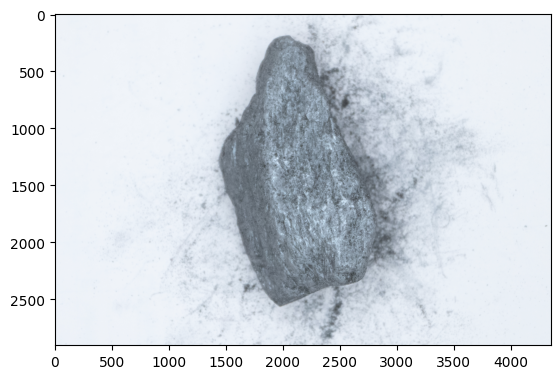

In [38]:
img = cv2.imread('/content/drive/MyDrive/Samples Graphite/To check/97/DSC09548.jpg')
plt.imshow(img)
plt.show()

In [39]:

resized_image = tf.image.resize(img, IMAGE_SIZE)
scaled_image = resized_image/255

In [40]:
scaled_image.shape


TensorShape([128, 128, 3])

In [41]:
np.expand_dims(scaled_image, 0).shape


(1, 128, 128, 3)

In [42]:
yhat = model.predict(np.expand_dims(scaled_image, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


In [43]:
yhat


array([[0.8456682]], dtype=float32)

In [44]:
class_names


['92%', '97%']

In [45]:

if yhat < 0.5:
    print(f'{class_names[0]}')
else:
    print(f'{class_names[1]}')

97%
